In [1]:
from vae_classes import *
from vae_functions import *

In [2]:
### saved model directory
path = r'/Users/VanessaYau/Downloads/Dias_Dev/vae_dev/vaemodel_run.pt'

Load in Training Data

In [3]:
input_dict = {"learn_data": "train_master.npy",
              "learn_labels": "labels_master.npy"}

train_loader, test_loader, train_data, test_data = load_training_data(input_dict)

Train Model

In [4]:
# ### uncomment if no model saved
# if torch.cuda.is_available():
#     device = torch.device('cuda')
# else:
#     device = torch.device('cpu')

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print(device, torch.cuda.is_available())
# # print(torch.cuda.get_device_name(0))

# latent_dims = 2
# vae = VariationalAutoencoder(latent_dims, device) # GPU
# vae, error = training_procedure(vae, train_loader, device, epochs=100)
# vae = vae.to(device)

# plotting the loss
# error = [item.detach().numpy() for item in error]
# plt.plot(np.hstack(error))

# ### save entire model
# torch.save(vae, path)

Load Saved Model

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device, torch.cuda.is_available())
latent_dims = 2
vae = VariationalAutoencoder(latent_dims, device) # GPU

# vae.load_state_dict(torch.load(path))
vae = torch.load(path)
vae.eval()

cpu False


VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (linear1): Linear(in_features=1200, out_features=512, bias=True)
    (linear_1): Linear(in_features=512, out_features=256, bias=True)
    (linear_2): Linear(in_features=256, out_features=128, bias=True)
    (linear_3): Linear(in_features=128, out_features=64, bias=True)
    (linear_4): Linear(in_features=64, out_features=32, bias=True)
    (linear2): Linear(in_features=32, out_features=2, bias=True)
    (linear3): Linear(in_features=32, out_features=2, bias=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=2, out_features=128, bias=True)
    (linear_2): Linear(in_features=128, out_features=256, bias=True)
    (linear_3): Linear(in_features=256, out_features=512, bias=True)
    (linear2): Linear(in_features=512, out_features=1200, bias=True)
  )
)

C:\Users\VanessaYau\AppData\Local\Temp\ipykernel_9236\166095303.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


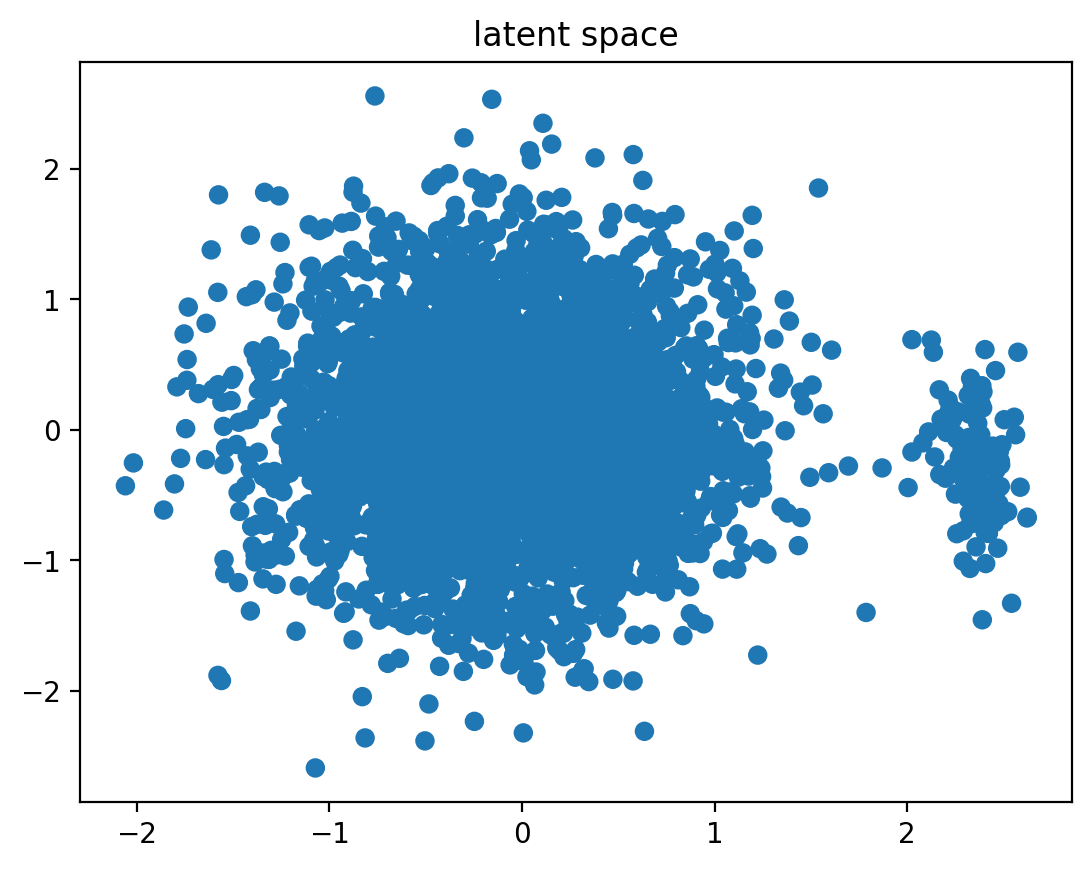

In [6]:
### plot latent space
fig = plot_latent_space(vae, train_loader, device) # set saveIt=1 to save, default 0
fig.show()

C:\Users\VanessaYau\AppData\Local\Temp\ipykernel_9236\4154481142.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


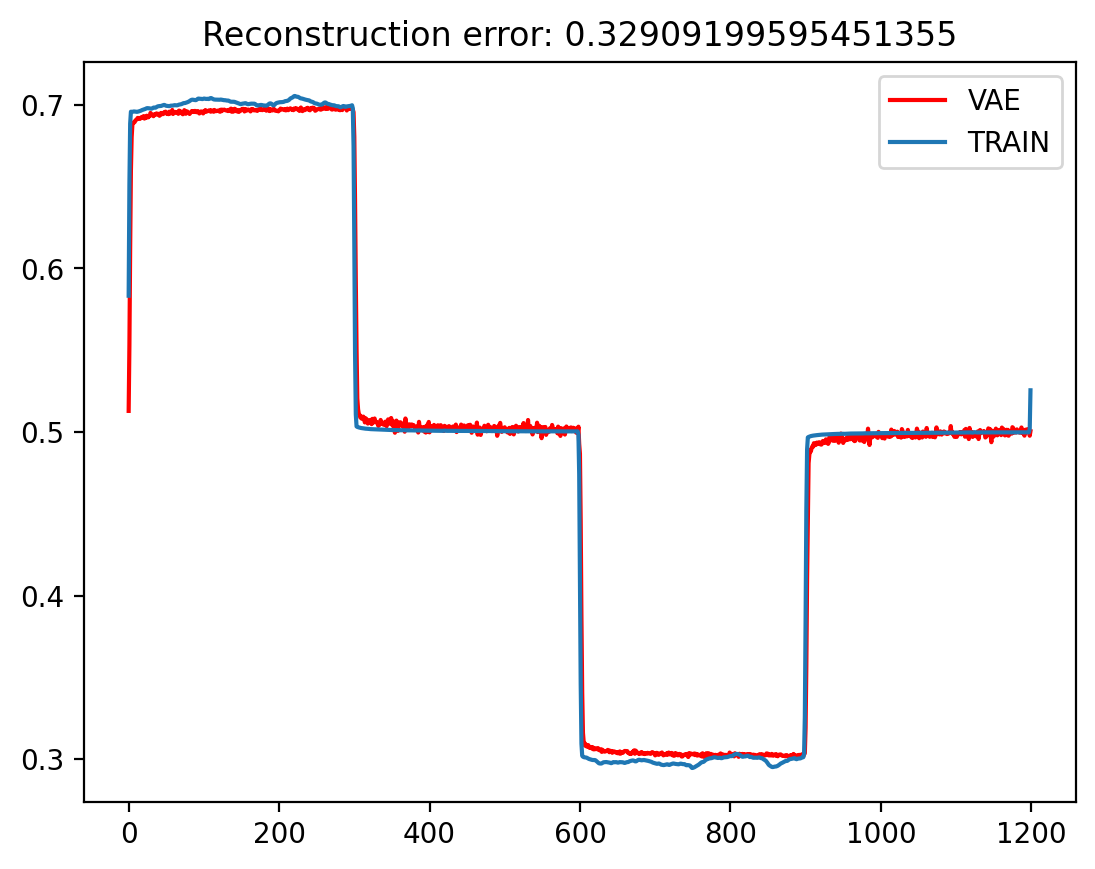

In [7]:
### plot a reconstructions (training data vs model)
fig = plot_reconstructions(test_data, vae, device) # set saveIt=1 to save as html, default 0
fig.show()

Test with Field Data

In [8]:
### load in DCIP time series
dir_path_dc = r'/Users/VanessaYau/Downloads/Dias_Dev/vae_dev/test_dat_less/' # can input single file or group of files

reconstruction_errors, receiver_dict, xc_data, xt_data = load_DCIPtimeseries(dir_path_dc, vae, device) 
# TODO this function is quite slow (lots of data could also be a culpret)


In [9]:
stds = []
stds_raw = []
locations = []
rec_error = []

lowest = 10.0
key_save = None
for key in receiver_dict.keys():

    stds.append(receiver_dict[key]['std'])
    stds_raw.append(receiver_dict[key]['std_ip'])
    locations += [[float(receiver_dict[key]['location'][0]), float(receiver_dict[key]['location'][1])]]
    rec_error += [np.mean(receiver_dict[key]['reconstruction_error'])]

    if np.min(receiver_dict[key]['reconstruction_error']) < lowest:

        lowest = np.median(receiver_dict[key]['reconstruction_error'])
        key_save = key


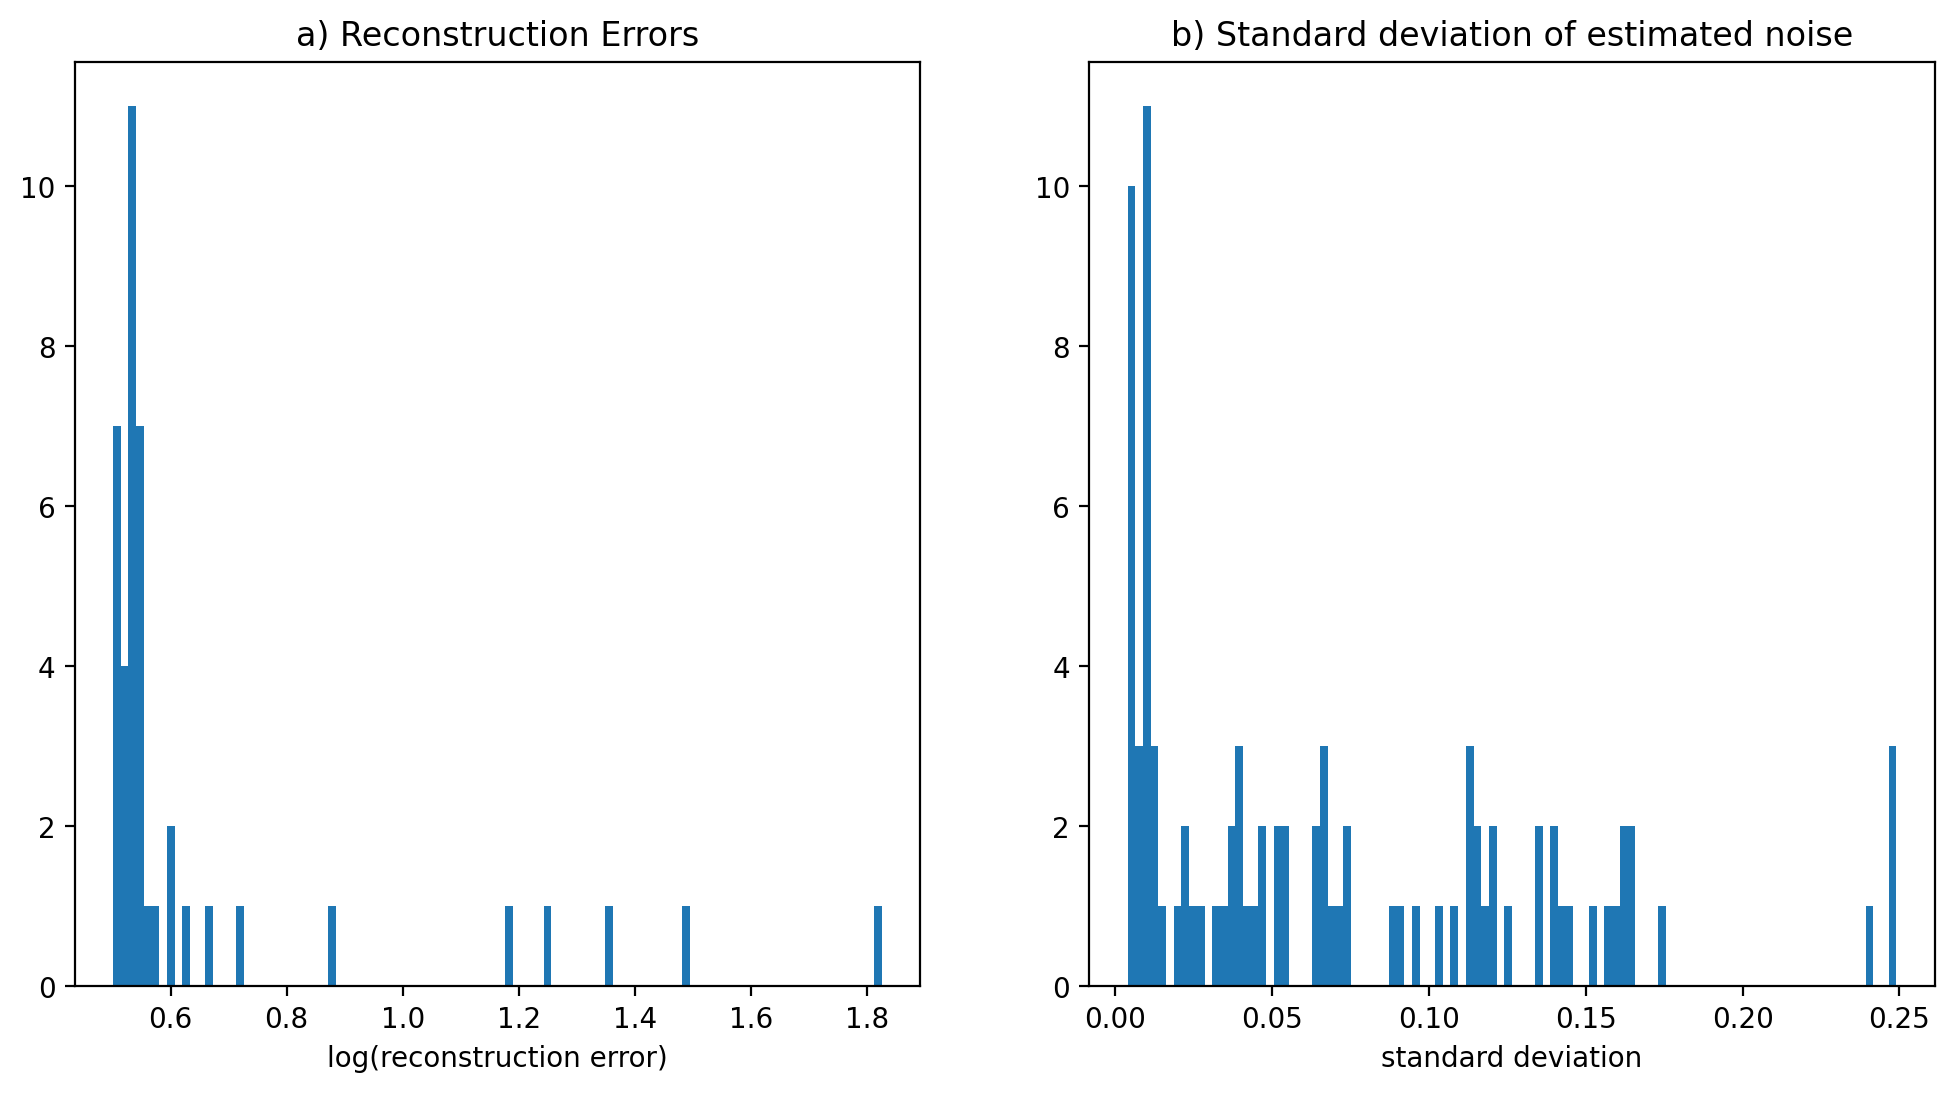

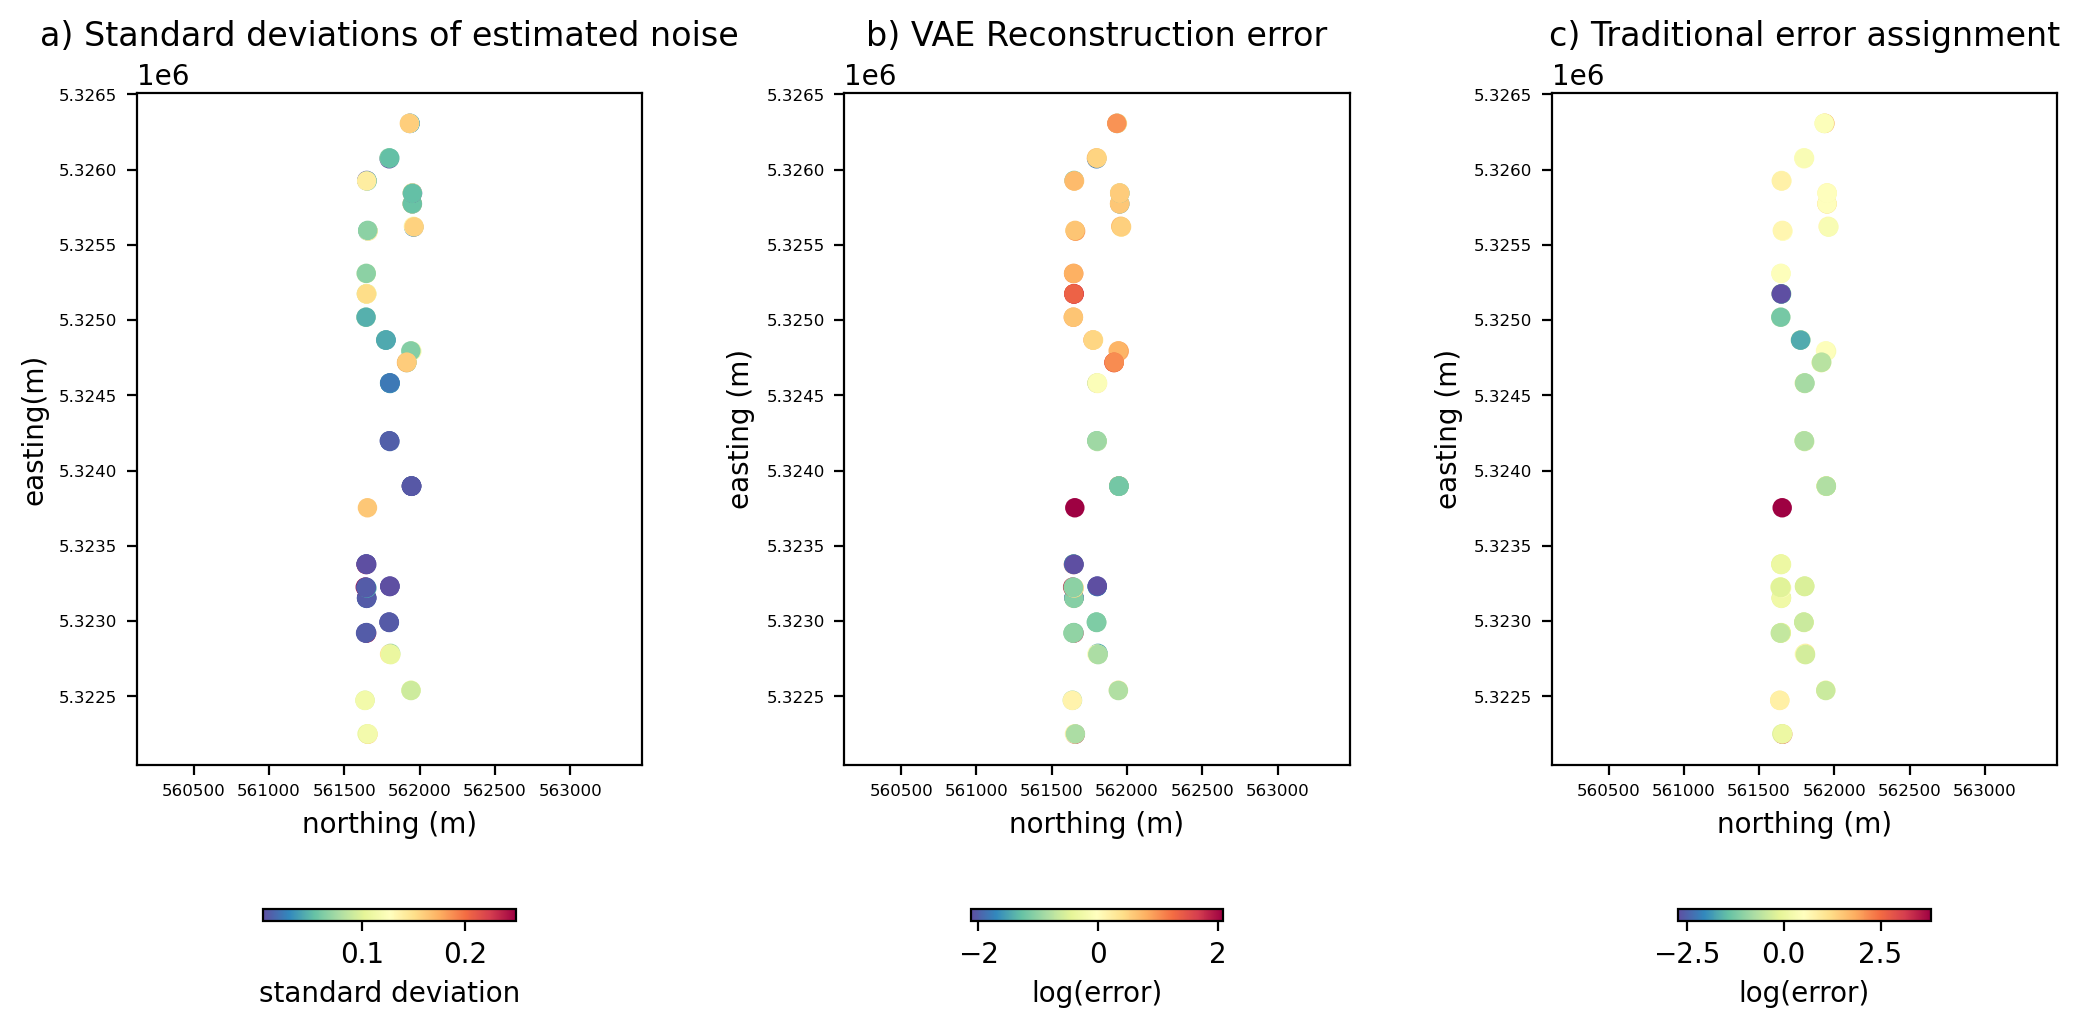

In [10]:
### plot field data
fig, axes = plot_histograms(reconstruction_errors, stds) # set saveIt=1 to save, default 0
plt.show()

fig, axes = plot_dist(locations, stds, stds_raw, rec_error)
plt.show()

c:\Users\VanessaYau\anaconda3\envs\dias_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.17971958 0.36068031 0.21361197 0.11129536 0.13469278]


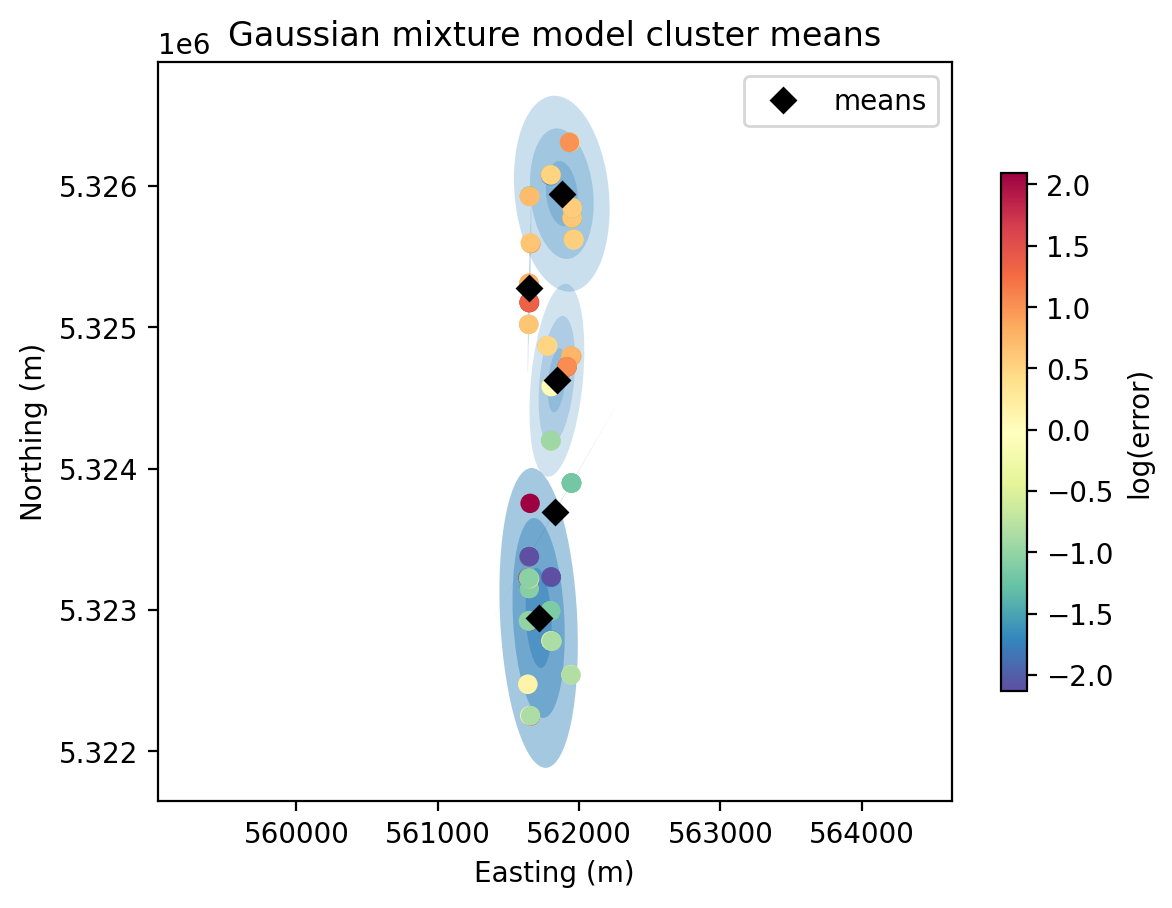

In [11]:
locations = np.vstack(locations)

fig, ax = plot_gmm(locations, rec_error)
plt.show()


In [12]:
### reconstruct the time series with one node
node = dir_path_dc + listdir(dir_path_dc)[4]

reconstruction_errors, receiver_dict, xc_data, xt_data = load_DCIPtimeseries(node, vae, device)

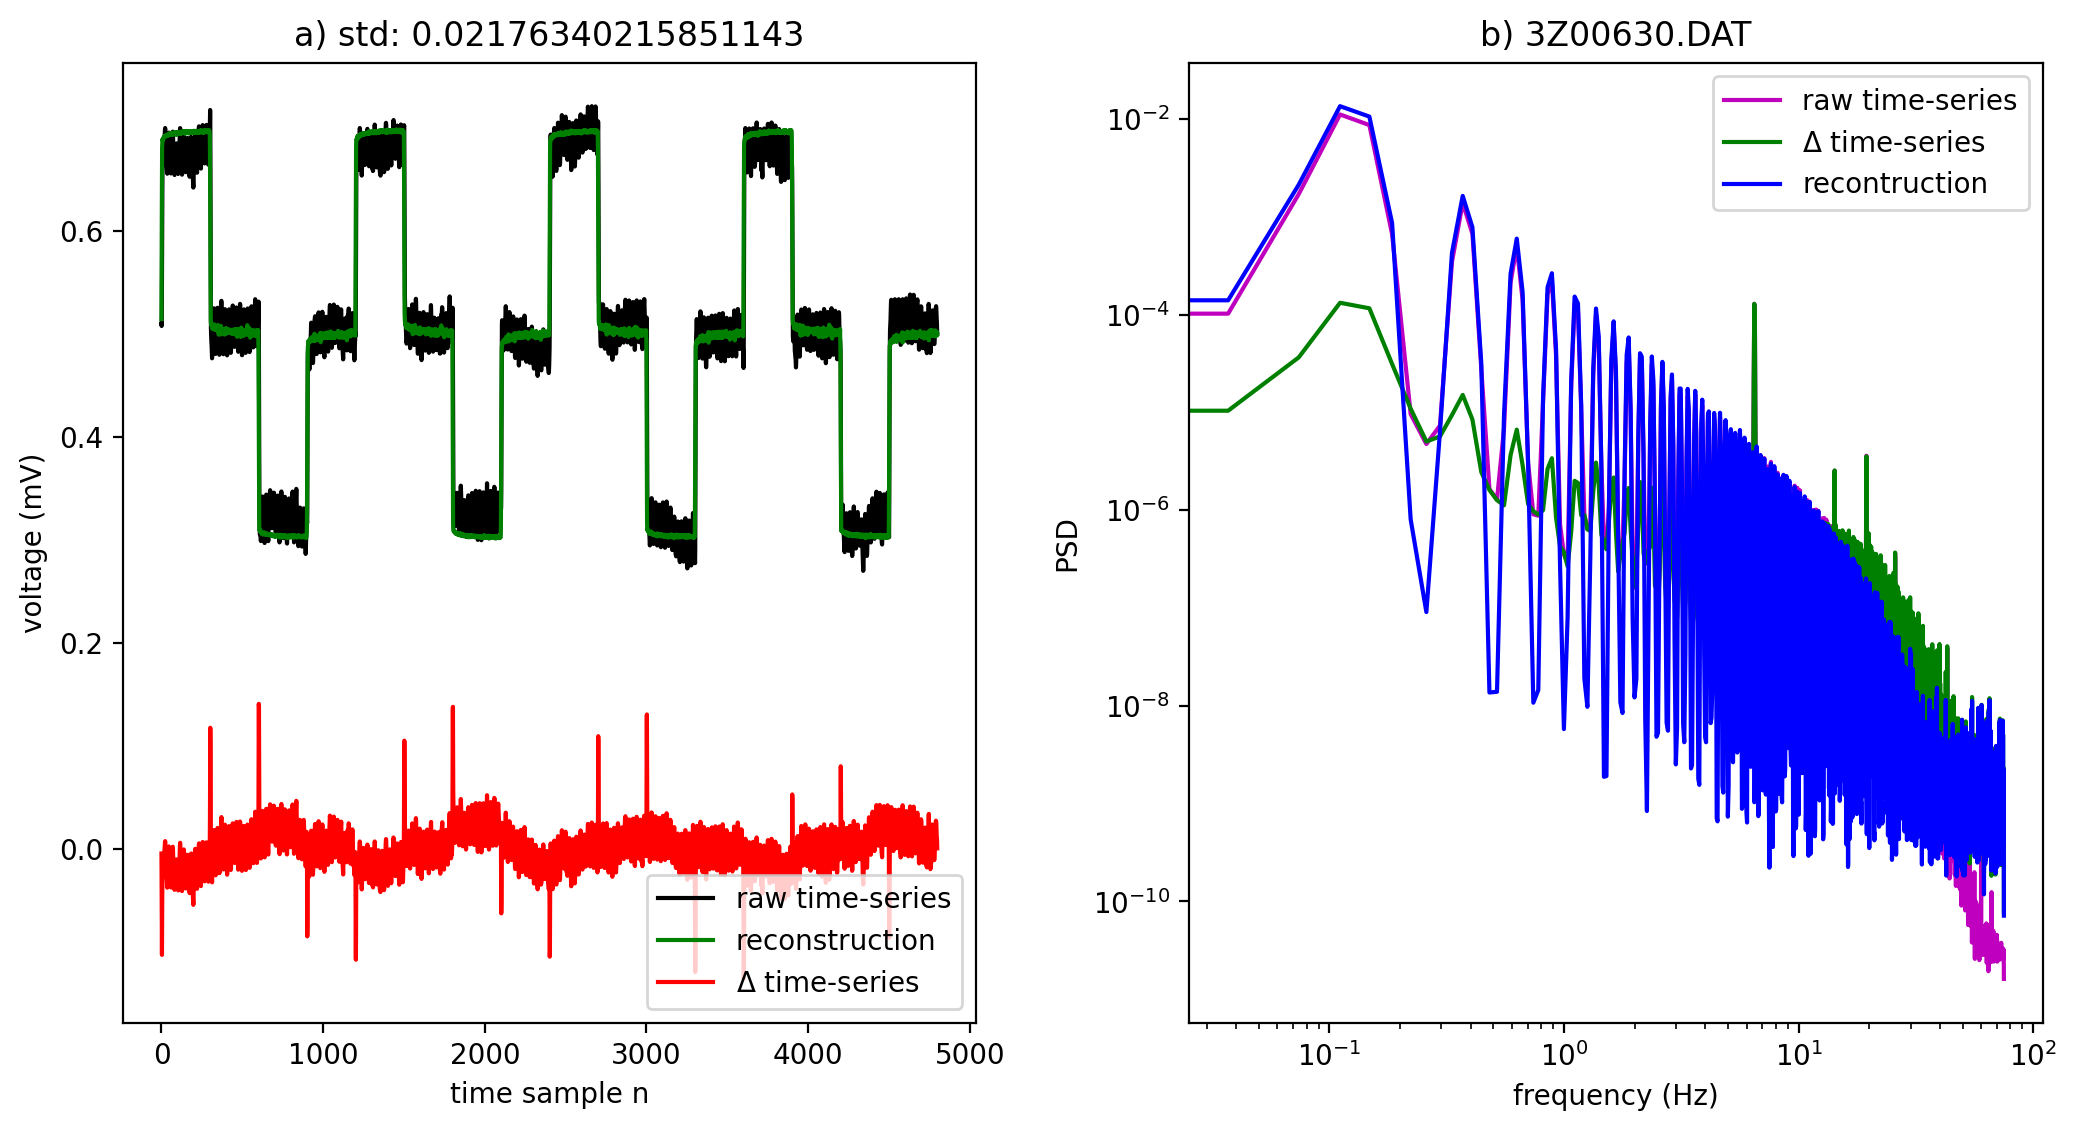

In [13]:
### plot field reconstruction of one node
fig, axs = plot_fieldreconstruction(xc_data, xt_data, node)
plt.show()

half T: 54.0 window: 54 Kernel: 54
0.17904367827950704
0.19753003312038686
0.0006484850840715351
0.00028414337372899084
0.08734475308597166
0.09655576487852094


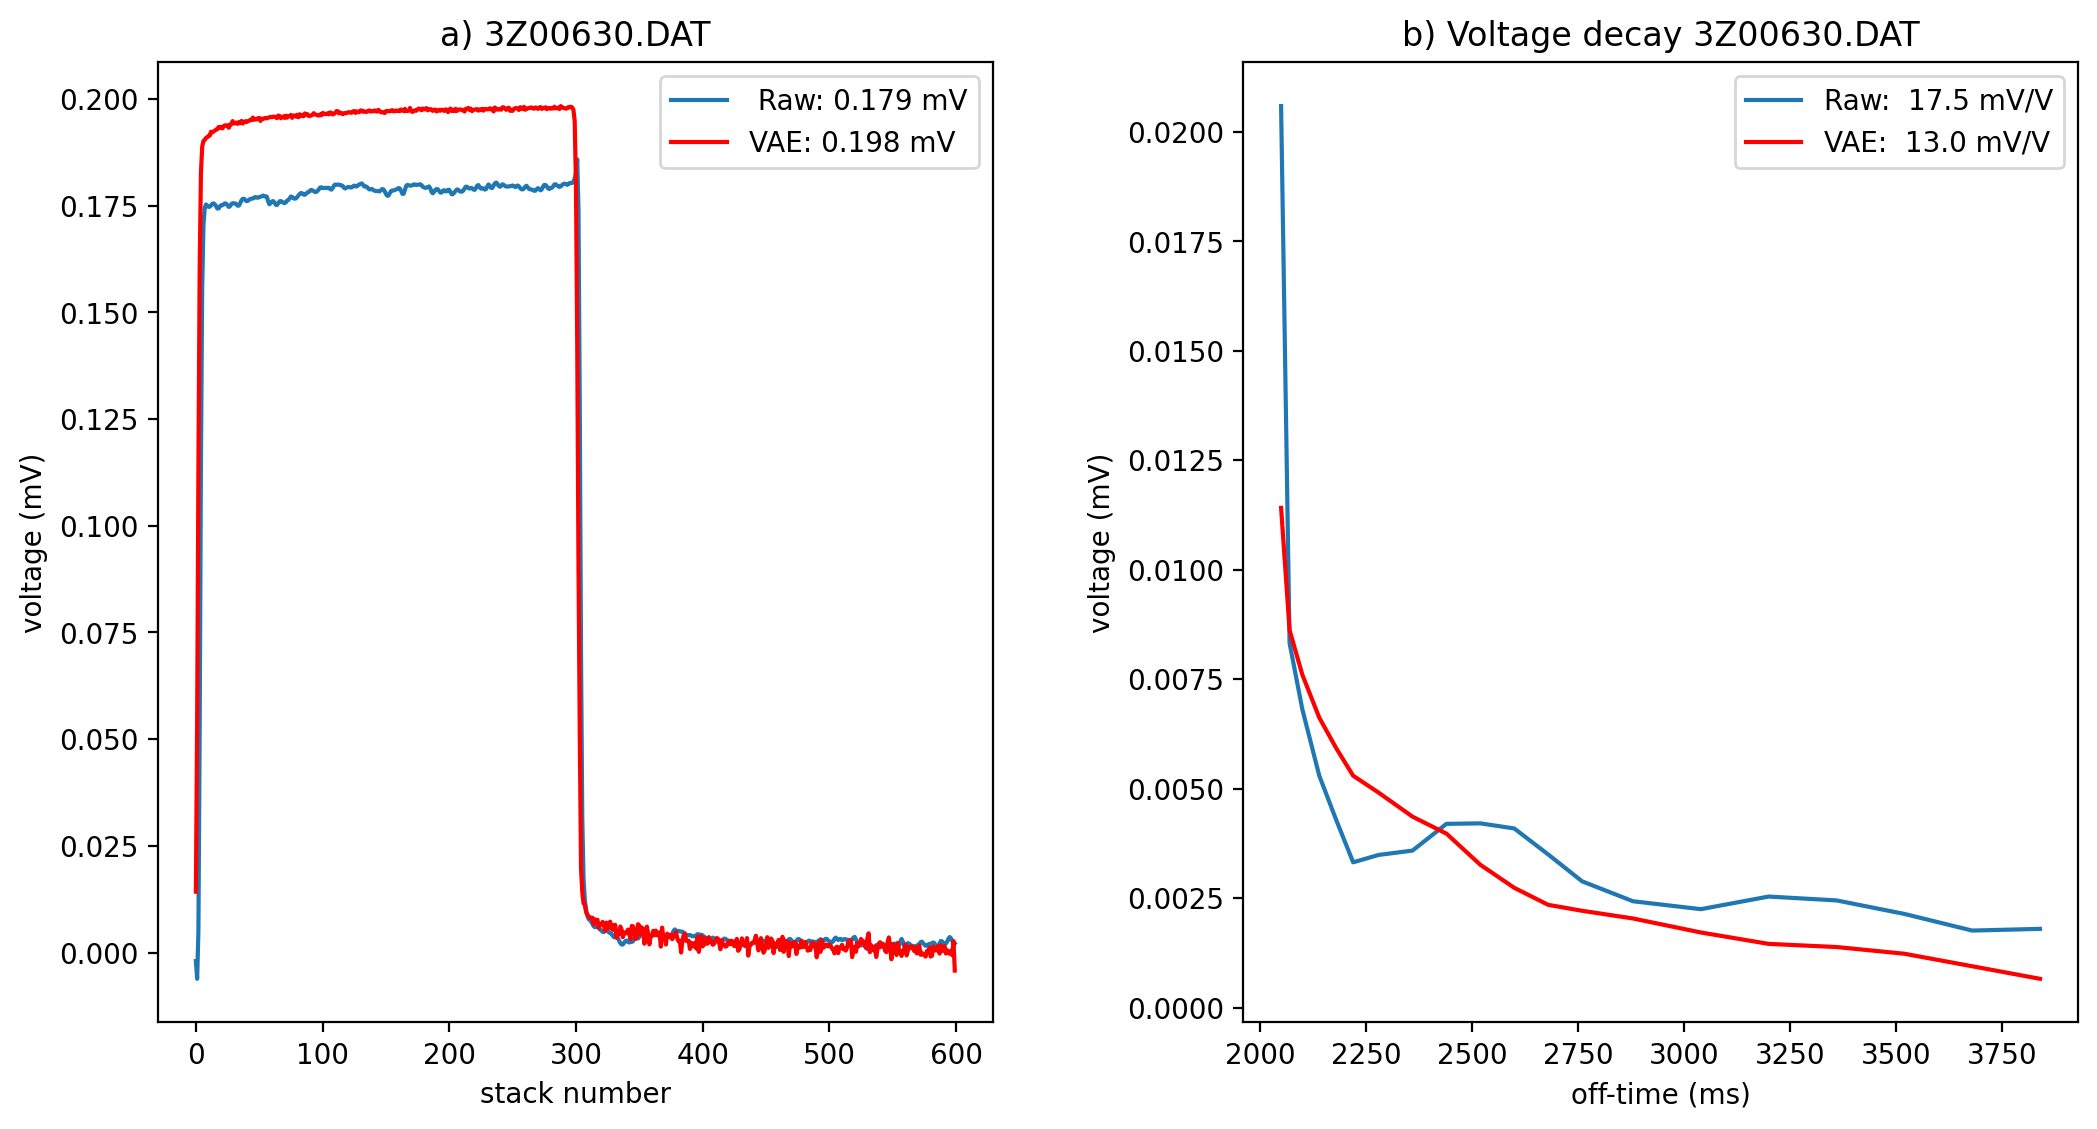

In [14]:
### plot voltage and decay (raw field data vs vae)
stack, stack2, decay, decay2, mx1, mx2, mid_time = stackDCIPdata(xc_data, xt_data)

fig, axs = plot_voltagedecay(stack, stack2, decay, decay2, mx1, mx2, mid_time, node)